## Text Exploration and Visualizations

In [1]:
## import all necessory packages
import pandas as pd

In [112]:
# read CSV training data
trainDf = pd.read_csv("jigsaw-toxic-comment-classification-challenge/train.csv")

In [113]:
# Review some data
trainDf[152:300]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
152,005fb1983ff191e9,The Alpha version had multiplayer. The Beta version did not.,0,0,0,0,0,0
153,0060062dd4db5195,"""\nPD: I just have seen that apart from the article Coat of arms of the Sahrawi Arab Democratic Republic, there is also a different article named Coat of arms of Western Sahara. That shows clearly that some users here have politically-driven intentions and bad faith, although they claim to be neutral. If they were neutral, logically they would work on the """"Coat of arms of Western Sahara"""" article, intead of trying to merge the two articles and messing it. """,0,0,0,0,0,0
154,00604eb295a1dbf2,)\n\nWe are not treating this as a forum. A question arose and was appropriately answered. End of story. ;-,0,0,0,0,0,0
155,0060c5c9030b2d14,"""\n\n Military history WikiProject Newsletter - Issue II \n\nThe April 2006 issue of the project newsletter is now out. You may read this issue or change the format in which future issues will be delivered to you by following the link. Thanks. """,0,0,0,0,0,0
156,0060ef190ee10720,. Between the unblock submission and response there is less that 3 minutes which proves that this administrator did not pay enough attention to this case,0,0,0,0,0,0
157,006120d209a4a46c,"""\n\n \n\nYour request to be unblocked has been granted for the following reason(s):\nAllowing username change to GianLuigiPalermo . Please put this request in at Wikipedia:Changing username as soon as possible to avoid re-blocking.\n\nRequest handled by: \n\n Unblocking administrator: Please check for active autoblocks on this user after accepting the unblock request.""",0,0,0,0,0,0
158,0061b075244dd234,"Once again, I responded to MileMoney's reasoning for his edit and I gave my reasoning for my edit. Yes, it is absolutely relevant to this page. There are other places for the discussion on income inequality than in the Progressive Tax article.",0,0,0,0,0,0
159,00637960a7ec3436,"""\n\nUNBLOCK ME OR I'LL GET MY LAWYERS ON TO YOU FOR BLOCKING MY CONSTITUTIONAL RIGHT TO FREE SPEECH""",1,0,0,0,0,0
160,0063a8786a7034fc,"""== Attributing and classifying of personalities == \nInvitation. Your input to Culture of Lithuania is welcomed. \nSome problems of defining personalities or attributing them to certain well-known ideological systems may raise here. I propose a quite liberal variant of it, where definition may not be connected with one certain word. Necessity however to follow certain classifying remains. \n\nMy initial ideas on this branch, the ones, concerning period of Lithuanian national Renaissance period: Some artists, writers or other cultural workers of this period are often described as modernists. This definition is not false, but some more concrete things should be added, some specifics of Lithuania. \nWe should distinguish leading ideas of the Nat. Renaissance from later modernism, which is more known for us. Cultural aspirations of the later Nat. Ren. may be defined as modernism in a cultural context of Lithuania. But they accented also expression of Lithuanian cultural heritage, and their expression may be seen as something simply typically Lithuanian. I mean, that such authors in as Čiurlionis is seen as modernist in Lithuanian context, but it also (and even more) is a representative of Lithuanian culture, when in European or World-wide context. A parallel example may be taken from literature of India. Poet Tagore, well known Nobel price winner is known for us as a representative of culture of India. Making India more understandable and closer for western people is concerned as main his input to Western culture. But in his own country, he was seen as a modernist too, who was changing traditional cultural forms, especially stagnated ones. This way also Lithuanian cultural leaders of the N. Ren. could be seen as modernists, which were broadening cultural forms and changing stagnated ones, in Lithuanian context. They also can be seen as mod

In [4]:
## Let's review all toxic comments.

pd.set_option("display.max_colwidth", 10000) # helps to view long comments
print(trainDf.loc[trainDf["toxic"] == 1]['comment_text'])


6                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [114]:
df_labels = trainDf.drop(["id", "comment_text"], axis=1 )
# print(df_labels)

In [115]:

label = list(df_labels.columns.values)

In [116]:
totels = []
for i in label:
    totels.append((i, df_labels[i].sum()))
totels = pd.DataFrame(totels, columns=["label","sum"])
totels

,label,sum
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


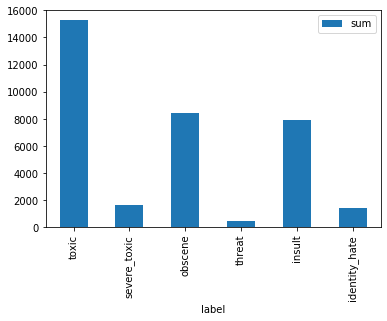

In [117]:
totels.plot(x = "label", y = "sum", kind = "bar")

In [118]:
rowsums = trainDf.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()
x

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

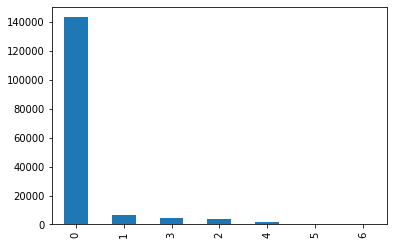

In [119]:
# 143346 comments with no labels
x.plot(kind='bar')

In [120]:
trainDf.describe()
# no null values.

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
# lets review text
trainDf["comment_text"][152:320]

152                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [122]:
# 'i'll
# I'm
# you'd
# this doc contains these we have to convert it into normal form, i found this function online which contains
# many of these expresions, i will add more in this.
import re
def clean_text(doc):
    doc = doc.lower()
    doc = re.sub(r"what's", "what is ", doc)
    doc = re.sub(r"\'s", " ", doc)
    doc = re.sub(r"\'ve", " have ", doc)
    doc = re.sub(r"can't", "can not ", doc)
    doc = re.sub(r"n't", " not ", doc)
    doc = re.sub(r"i'm", "i am ", doc)
    doc = re.sub(r"\'re", " are ", doc)
    doc = re.sub(r"\'d", " would ", doc)
    doc = re.sub(r"\'ll", " will ", doc)
    doc = re.sub(r"\'scuse", " excuse ", doc)
    doc = re.sub('\W', ' ', doc)
    doc = re.sub('\s+', ' ', doc)
    doc = doc.strip(' ')
    return doc

In [123]:
trainDf['comment_text'] = trainDf['comment_text'].map(lambda comments : clean_text(comments))

In [124]:
# after processing
trainDf["comment_text"][152:320]

152                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [125]:
# train test split
from sklearn.model_selection import train_test_split 
L = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train, test = train_test_split(trainDf, random_state=42, test_size=0.33, shuffle=True)
X_train = train.comment_text
X_test = test.comment_text
print(X_train.shape)
print(X_test.shape)

(106912,)
(52659,)


In [126]:
# reading testing data
testingDF = pd.read_csv("jigsaw-toxic-comment-classification-challenge/test.csv")
testingDF['comment_text'] = testingDF['comment_text'].map(lambda comments : clean_text(comments))
testingDF.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then you will ever be whats up with you and hating you sad mofuckas i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me ja rule is about pride in da music man dont diss that shit on him and nothin is wrong bein like tupac he was a brother too fuckin white boys get things right next time
1,0000247867823ef7,from rfc the title is fine as it is imo
2,00013b17ad220c46,sources zawe ashton on lapland
3,00017563c3f7919a,if you have a look back at the source the information i updated was the correct form i can only guess the source had not updated i shall update the information once again but thank you for your message
4,00017695ad8997eb,i do not anonymously edit articles at all


In [127]:
#len of testing data
len(testingDF)

153164

In [128]:
submitDF = pd.read_csv("jigsaw-toxic-comment-classification-challenge/sample_submission.csv")
submitDF = submitDF.drop(columns=['toxic','severe_toxic','obscene', 'threat', 'insult', 'identity_hate'])
submitDF.head()

,id
0,00001cee341fdb12
1,0000247867823ef7
2,00013b17ad220c46
3,00017563c3f7919a
4,00017695ad8997eb


In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
stop_words = set(stopwords.words('english'))

pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
x = {}
for label in L:
    print('... Processing {}'.format(label))
    pipeline.fit(X_train, train[label])
    prediction = pipeline.predict(X_test)
    print("prediction", len(prediction))
    print('Test accuracy is {}'.format(accuracy_score(test[label], prediction)))
    x[label] = pipeline.predict_proba(testingDF['comment_text'])[:,1]

... Processing toxic
prediction 52659
Test accuracy is 0.9549364780949126
... Processing severe_toxic
prediction 52659
Test accuracy is 0.9910556600011394
... Processing obscene
prediction 52659
Test accuracy is 0.9761104464573956
... Processing threat
prediction 52659
Test accuracy is 0.9973603752444976
... Processing insult
prediction 52659
Test accuracy is 0.9687612753755294
... Processing identity_hate
prediction 52659
Test accuracy is 0.991758293928863


In [131]:
#  merge and prepare submition.csv
subDF = pd.DataFrame(x)
finalDF = pd.concat([submitDF, subDF],  axis=1, sort=False)
finalDF.to_csv("sample_submission.csv")
finalDF.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.992816,0.159454,0.986326,0.024904,0.911359,0.186564
1,0000247867823ef7,0.012822,0.003557,0.010801,0.001940,0.010307,0.004539
2,00013b17ad220c46,0.051046,0.005337,0.021430,0.002190,0.025463,0.006202
3,00017563c3f7919a,0.004796,0.002454,0.004752,0.001574,0.004169,0.001547
4,00017695ad8997eb,0.037994,0.003691,0.011822,0.001960,0.013844,0.004021
